In [19]:
#### NEW PILOT DATA WITH BALANCED TRIAL SPREADSHEET ####


In [20]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [21]:
#import excel file containing data summary

#wtpdata = pd.read_csv(r'new_pilot_wtp.csv', encoding='utf-8-sig')
wtpdata = pd.read_csv(r'new_wtp_data.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)

                 participant  avg_spent_social  avg_spent_nonsocial  \
0   5914b7b50a4b9d0001add64f          0.020870             0.022963   
1   5beaed3f0af61d0001968d9a          0.033846             0.030000   
2   5c523d16102de10001022098          0.029211             0.031667   
3   5dc368ce880a2927e264dbec          0.029474             0.032258   
4   5e70d4869ffb1404cb1f5070          0.024444             0.022174   
5   5efc9ea8f8e7950584b12e87          0.032258             0.031579   
6   5f2f566ddaea2a3417b75920          0.021304             0.022593   
7   5f3964ca4539e00bd5ce47fb          0.028750             0.028077   
8   5f793609f8089e53266336f5          0.030233             0.030000   
9   5f8c70c9c8e71c0b49e49797          0.028000             0.029143   
10  5f94977cf830e82e361b9de1          0.030000             0.030882   
11  5f963718a844b719781e9e85          0.022222             0.025000   
12  60fc6bdffe3e6e8caf924670          0.022273             0.023571   
13  60

In [22]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.028741123088
standard error of the mean: 0.000599105866


In [23]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences


nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.027936831491
standard error of the mean: 0.000517604301


In [24]:
#sample size
n = len(wtpdata)
print(n)

57


In [25]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.000551015217592315 0.045844621
0.003030036463057622


In [26]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00040133813384067406


In [27]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

2.0040248575295356


In [28]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

56


In [29]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=2.004, df=56, cv=1.673, p=0.050
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [30]:
wtp_long= pd.read_csv(r'new_wtp_data_LONG.csv')
print(wtp_long)

                  participant  sum_spent        S_NS  avg_spent      prop  AQ  \
0    5914b7b50a4b9d0001add64f       0.48      Social   0.020870  0.460000  24   
1    5beaed3f0af61d0001968d9a       0.44      Social   0.033846  0.265306  30   
2    5c523d16102de10001022098       1.11      Social   0.029211  0.760000  15   
3    5dc368ce880a2927e264dbec       0.56      Social   0.029474  0.380000  26   
4    5e70d4869ffb1404cb1f5070       0.66      Social   0.024444  0.540000  15   
5    5efc9ea8f8e7950584b12e87       1.00      Social   0.032258  0.620000  19   
6    5f2f566ddaea2a3417b75920       0.49      Social   0.021304  0.460000  32   
7    5f3964ca4539e00bd5ce47fb       0.69      Social   0.028750  0.480000  28   
8    5f793609f8089e53266336f5       1.30      Social   0.030233  0.860000  19   
9    5f8c70c9c8e71c0b49e49797       0.42      Social   0.028000  0.300000  22   
10   5f94977cf830e82e361b9de1       0.48      Social   0.030000  0.320000  18   
11   5f963718a844b719781e9e8

In [31]:
# wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

# wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [32]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.19028827956545194


In [33]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support
iri_total = wtpdata.IRI_total #iri - total sum
iri_ec = wtpdata.IRI_EC #iri - empathetic concern
iri_pd = wtpdata.IRI_PD # iri - personal distress
iri_pt = wtpdata.IRI_PT #iri - perspective taking
iri_fs = wtpdata.IRI_FS # iri - fantasy

# prop_social = wtpdata['prop_social']
# aq = wtp_long.AQ #autism quotient
# mspss = wtp_long.MSPSS #perceived social support

# iri_total = wtp_long.IRI_total #iri - total sum
# iri_ec = wtp_long.IRI_EC #iri - empathetic concern
# iri_pd = wtp_long.IRI_PD # iri - personal distress
# iri_pt = wtp_long.IRI_PT #iri - perspective taking
# iri_fs = wtp_long.IRI_FS # iri - fantasy

In [34]:
# #amount spent on social / mulitdimensional scale of perceived social support
# pyplot.scatter(socialavg, mspss)
# pyplot.show()
# covariance = cov(socialavg, mspss)
# print(covariance)
# corr, _ = pearsonr(socialavg, mspss)
# print('Pearsons correlation: %.3f' % corr)
# r,p = scipy.stats.pearsonr(socialavg, mspss)
# print('p value: %.4f' % p)
# alpha = 0.10
# if p > alpha:
# 	print('Accept null hypothesis that the means are equal.')
# else:
#     print('Reject the null hypothesis that the means are equal.')

In [35]:
# #amount spent on social / aq
# pyplot.scatter(socialavg, aq)
# pyplot.show()
# covariance = cov(socialavg, aq)
# print(covariance)
# corr, _ = pearsonr(socialavg, aq)
# print('Pearsons correlation: %.3f' % corr)
# r,p = scipy.stats.pearsonr(socialavg, aq)
# print('p value: %.4f' % p)
# alpha = 0.10
# if p > alpha:
# 	print('Accept null hypothesis that the means are equal.')
# else:
#     print('Reject the null hypothesis that the means are equal.')

In [36]:
##### prop of chosen social // self report #####

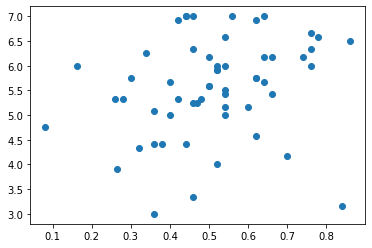

[[0.02645901 0.03853492]
 [0.03853492 0.99125853]]
Pearsons correlation: 0.238
p value: 0.0747
Reject the null hypothesis that the means are equal.


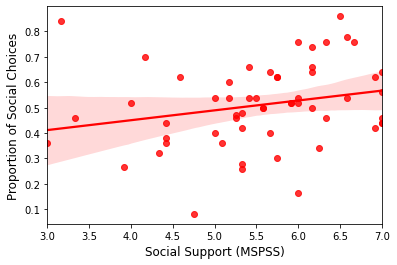

In [37]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

prop_mspss= sns.regplot(x="MSPSS", y="prop_social", data=wtpdata,color="red");
prop_mspss.set_ylabel('Proportion of Social Choices',fontsize=12)
prop_mspss.set_xlabel('Social Support (MSPSS)',fontsize=12)
prop_mspss.figure.savefig('new_prop_mspss_scatter.svg')

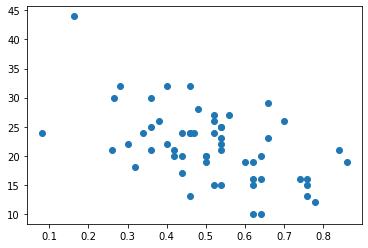

[[ 2.64590149e-02 -5.30236305e-01]
 [-5.30236305e-01  3.82406015e+01]]
Pearsons correlation: -0.527
p value: 0.0000
Reject the null hypothesis that the means are equal.


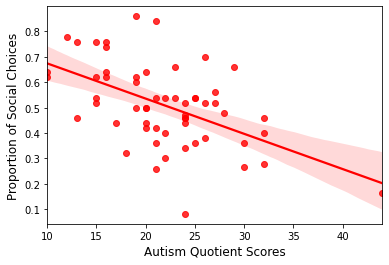

In [38]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
prop_aq= sns.regplot(x="AQ", y="prop_social", data=wtpdata,color="red");
prop_aq.set_ylabel('Proportion of Social Choices',fontsize=12)
prop_aq.set_xlabel('Autism Quotient Scores',fontsize=12)
prop_aq.figure.savefig('new_prop_aq_scatter.svg')

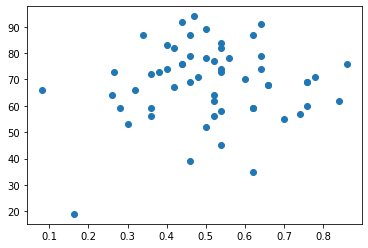

[[2.64590149e-02 2.10387065e-01]
 [2.10387065e-01 2.07276942e+02]]
Pearsons correlation: 0.090
p value: 0.5063
Accept null hypothesis that the means are equal.


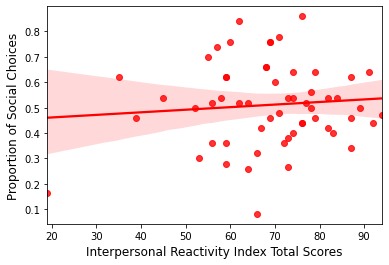

In [39]:
#prop social  / iri total

pyplot.scatter(prop_social, iri_total)
pyplot.show()
covariance = cov(prop_social, iri_total)
print(covariance)
corr, _ = pearsonr(prop_social, iri_total)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_total)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_prop_iri_total=sns.regplot(x="IRI_total", y="prop_social", data=wtpdata,color="red");
s_prop_iri_total.set_ylabel('Proportion of Social Choices',fontsize=12)
s_prop_iri_total.set_xlabel('Interpersonal Reactivity Index Total Scores',fontsize=12)
s_prop_iri_total.figure.savefig('new_s_prop_iri_total_scatter.svg')

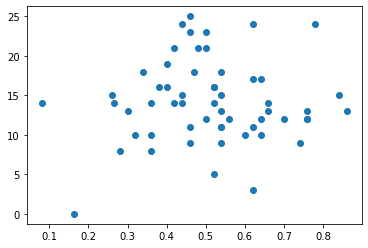

[[2.64590149e-02 4.91786865e-02]
 [4.91786865e-02 2.70281955e+01]]
Pearsons correlation: 0.058
p value: 0.6674
Accept null hypothesis that the means are equal.


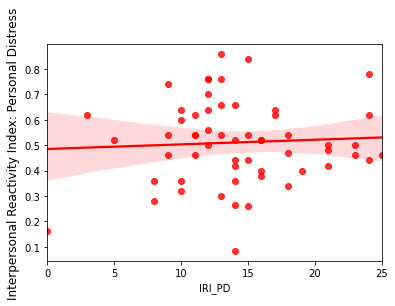

In [40]:
#propsocial  / iri pd
pyplot.scatter(prop_social, iri_pd)
pyplot.show()
covariance = cov(prop_social, iri_pd)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_prop_iri_pd=sns.regplot(x="IRI_PD", y="prop_social", data=wtpdata,color="red");
s_prop_iri_pd.set_ylabel('Proportion of Social Choices',fontsize=12)
s_prop_iri_pd.set_ylabel('Interpersonal Reactivity Index: Personal Distress',fontsize=12)
s_prop_iri_pd.figure.savefig('new_s_prop_iri_pd_scatter.svg')

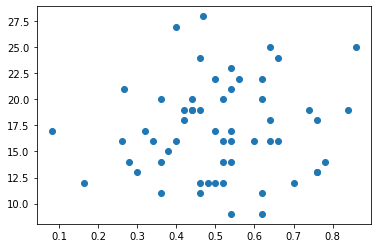

[[ 0.02645901  0.06505255]
 [ 0.06505255 20.41729323]]
Pearsons correlation: 0.089
p value: 0.5127
Accept null hypothesis that the means are equal.


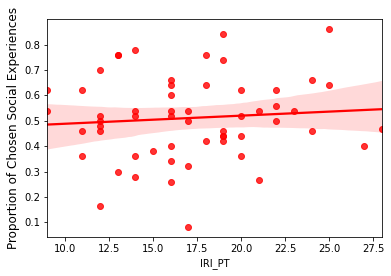

In [41]:
#propsocial  / iri pt
pyplot.scatter(prop_social, iri_pt)
pyplot.show()
covariance = cov(prop_social, iri_pt)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_prop_iri_pt=sns.regplot(x="IRI_PT", y="prop_social", data=wtpdata,color="red");
s_prop_iri_pt.set_ylabel('Proportion of Chosen Social Experiences',fontsize=12)
s_prop_iri_pt.figure.savefig('new_s_prop_pt_scatter.svg')

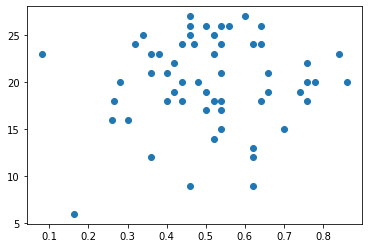

[[ 0.02645901  0.05780344]
 [ 0.05780344 23.01754386]]
Pearsons correlation: 0.074
p value: 0.5840
Accept null hypothesis that the means are equal.


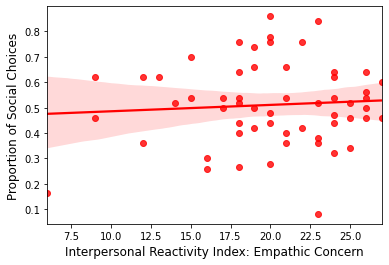

In [42]:
#propsocial  / iri ec
pyplot.scatter(prop_social, iri_ec)
pyplot.show()
covariance = cov(prop_social, iri_ec)
print(covariance)
corr, _ = pearsonr(prop_social, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_prop_iri_ec=sns.regplot(x="IRI_EC", y="prop_social", data=wtpdata,color="red");
s_prop_iri_ec.set_ylabel('Proportion of Social Choices',fontsize=12)
s_prop_iri_ec.set_xlabel('Interpersonal Reactivity Index: Empathic Concern',fontsize=12)
s_prop_iri_ec.figure.savefig('new_s_prop_iri_ec_scatter.svg')

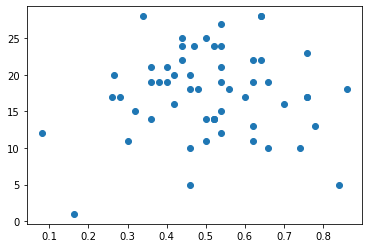

[[2.64590149e-02 3.83523861e-02]
 [3.83523861e-02 3.43609023e+01]]
Pearsons correlation: 0.040
p value: 0.7664
Accept null hypothesis that the means are equal.


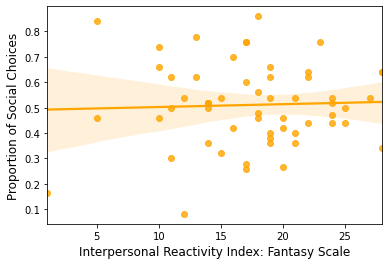

In [43]:
#propsocial  / iri fs
pyplot.scatter(prop_social, iri_fs)
pyplot.show()
covariance = cov(prop_social, iri_fs)
print(covariance)
corr, _ = pearsonr(prop_social, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_prop_iri_fs=sns.regplot(x="IRI_FS", y="prop_social", data=wtpdata,color="orange");
s_prop_iri_fs.set_ylabel('Proportion of Social Choices',fontsize=12)
s_prop_iri_fs.set_xlabel('Interpersonal Reactivity Index: Fantasy Scale',fontsize=12)
s_prop_iri_fs.figure.savefig('old_s_prop_iri_fs_scatter.svg')

In [44]:
##### avg spent on nonsocial // self report #####

In [45]:
# # nonsocial // mspss (social support)
# pyplot.scatter(nonsocialavg, mspss)
# pyplot.show()
# covariance = cov(nonsocialavg, mspss)
# print(covariance)
# corr, _ = pearsonr(nonsocialavg, mspss)
# print('Pearsons correlation: %.3f' % corr)
# r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
# print('p value: %.4f' % p)
# alpha = 0.10
# if p > alpha:
# 	print('Accept null hypothesis that the means are equal.')
# else:
#     print('Reject the null hypothesis that the means are equal.')

In [46]:
# # nonsocial // aq
# pyplot.scatter(nonsocialavg, aq)
# pyplot.show()
# covariance = cov(nonsocialavg, aq)
# print(covariance)
# corr, _ = pearsonr(nonsocialavg, aq)
# print('Pearsons correlation: %.3f' % corr)
# r,p = scipy.stats.pearsonr(nonsocialavg, aq)
# print('p value: %.4f' % p)
# alpha = 0.10
# if p > alpha:
# 	print('Accept null hypothesis that the means are equal.')
# else:
#     print('Reject the null hypothesis that the means are equal.')

In [47]:
###################################

In [48]:
#### t stat for proportions ####

In [49]:
prop_social= wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_social)
print('mean: %.12f'% (prop_soc_M))


prop_nonsocial= wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocial)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.510870032211
mean: 0.489129967789


In [50]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_social[i]-prop_nonsocial[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_social[i]-prop_nonsocial[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

5.953759268374846 1.2391836719999998
0.32532454497437874


In [51]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.04309028863660267


In [52]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

0.5045235274331784


In [53]:
#sample size
n = len(wtpdata)
print(n)

# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

57
56


In [54]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')



t=0.505, df=56, cv=1.673, p=0.616
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


In [55]:
# wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})
# print(wtp_means)
# wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)

wtp_means2 = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_social, prop_nonsocial]})
print(wtp_means2)

  experience_type                                        prop_chosen
0          social  0     0.460000
1     0.265306
2     0.760000
3...
1       nonsocial  0     0.540000
1     0.734694
2     0.240000
3...


In [56]:
#calculate effect size- cohens d

cohens_d = (mean(prop_social) - mean(prop_nonsocial)) / (sqrt((stdev(prop_social) ** 2 + stdev(prop_nonsocial) ** 2) / 2))
print(cohens_d)

0.1336515473971676


In [57]:
###################################

In [58]:
#### t stats for sums #####

In [59]:
social_sum= wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))

mean: 0.733157894737


In [60]:
nonsocial_sum= wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))


mean: 0.680701754386


In [61]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

13.456100000000001 2.9899999999999998


In [62]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.487326088766013


In [63]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)


0.0645479173012536


In [64]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

0.8126697582829436


In [65]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

56


In [66]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
    
#calculate effect size- cohens d

cohens_d = (mean(social_sum) - mean(nonsocial_sum)) / (sqrt((stdev(social_sum) ** 2 + stdev(nonsocial_sum) ** 2) / 2))

print(cohens_d)

t=0.813, df=56, cv=1.673, p=0.420
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.
0.2010360437374129


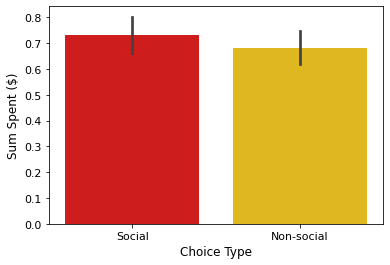

In [67]:
#wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x="S_NS", y="sum_spent", data=wtp_long, palette="hot")
wtp_plot.set_xlabel('Choice Type',fontsize=12)
wtp_plot.set_ylabel('Sum Spent ($)',fontsize=12)
wtp_plot.tick_params(labelsize=11)
#wtp_plot.figure.savefig('new_choicetype_sumspent.svg')


In [68]:
#### sum // self-report ####

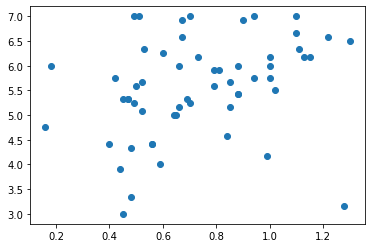

[[0.07211485 0.0797016 ]
 [0.0797016  0.99125853]]
Pearsons correlation: 0.298
p value: 0.0243
Reject the null hypothesis that the means are equal.


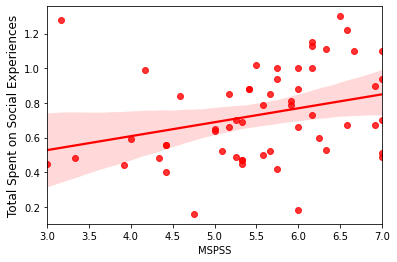

In [69]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
sum_mspss = sns.regplot(x="MSPSS", y="total_spent_social", data=wtpdata,color="red");
sum_mspss.set_ylabel('Total Spent on Social Experiences',fontsize=12)
sum_mspss.figure.savefig('new_sum_mspss_scatter.svg')

57
57


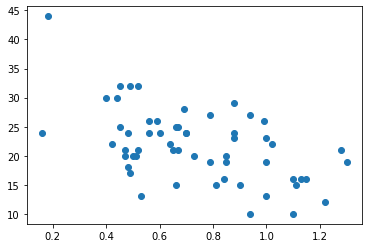

[[ 0.07211485 -0.87610902]
 [-0.87610902 38.2406015 ]]
Pearsons correlation: -0.528
p value: 0.0000
Reject the null hypothesis that the means are equal.


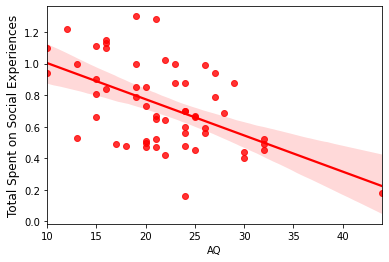

In [70]:
#sum of social / aq
print(len(social_sum))
print(len(aq))
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
sum_aq= sns.regplot(x="AQ", y="total_spent_social", data=wtpdata,color="red");
sum_aq.set_ylabel('Total Spent on Social Experiences',fontsize=12)
sum_aq.figure.savefig('new_sum_aq_scatter.svg')

57
57


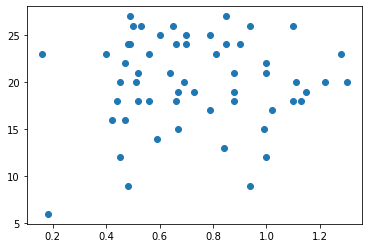

[[ 0.07211485  0.07773496]
 [ 0.07773496 23.01754386]]
Pearsons correlation: 0.060
p value: 0.6557
Accept null hypothesis that the means are equal.


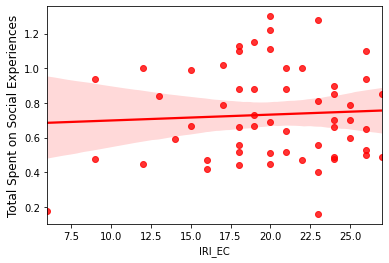

In [71]:
#sum of social  / iri ec
print(len(social_sum))
print(len(iri_ec))
pyplot.scatter(social_sum, iri_ec)
pyplot.show()
covariance = cov(social_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(social_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_sum_iri_ec=sns.regplot(x="IRI_EC", y="total_spent_social", data=wtpdata,color="red");
s_sum_iri_ec.set_ylabel('Total Spent on Social Experiences',fontsize=12)
s_sum_iri_ec.figure.savefig('old_s_sum_iri_ec_scatter.svg')

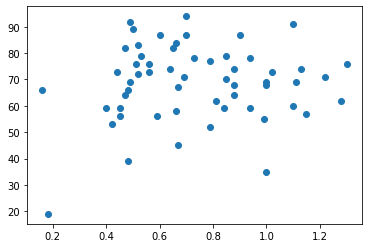

[[7.21148496e-02 3.66973684e-01]
 [3.66973684e-01 2.07276942e+02]]
Pearsons correlation: 0.095
p value: 0.4825
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'Total Spent on Social Experiences')

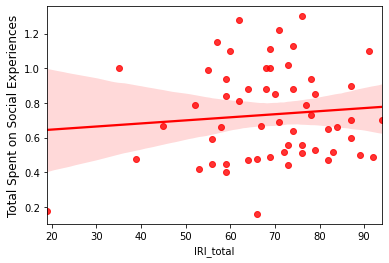

In [72]:
#sum of social  / iri total
pyplot.scatter(social_sum, iri_total)
pyplot.show()
covariance = cov(social_sum, iri_total)
print(covariance)
corr, _ = pearsonr(social_sum, iri_total)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_total)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_sum_iri_total=sns.regplot(x="IRI_total", y="total_spent_social", data=wtpdata,color="red");
s_sum_iri_total.set_ylabel('Total Spent on Social Experiences',fontsize=12)
#s_sum_iri_total.figure.savefig('old_s_sum_iri_total_scatter.svg')

57
57


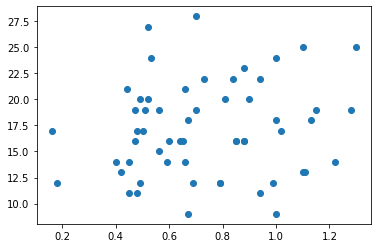

[[ 0.07211485  0.16591165]
 [ 0.16591165 20.41729323]]
Pearsons correlation: 0.137
p value: 0.3105
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'Total Spent on Social Experiences')

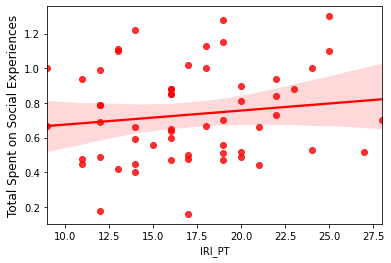

In [73]:
#sum of social  / iri pt
print(len(social_sum))
print(len(iri_pt))
pyplot.scatter(social_sum, iri_pt)
pyplot.show()
covariance = cov(social_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_sum_iri_pt=sns.regplot(x="IRI_PT", y="total_spent_social", data=wtpdata,color="red");
s_sum_iri_pt.set_ylabel('Total Spent on Social Experiences',fontsize=12)
#s_sum_iri_total.figure.savefig('old_s_sum_iri_total_scatter.svg')

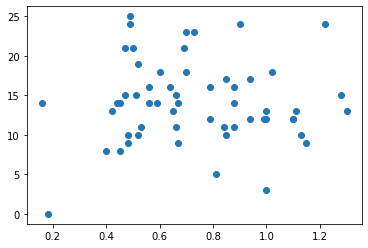

[[7.21148496e-02 1.62781955e-02]
 [1.62781955e-02 2.70281955e+01]]
Pearsons correlation: 0.012
p value: 0.9314
Accept null hypothesis that the means are equal.


Text(0, 0.5, 'Total Spent on Social Experiences')

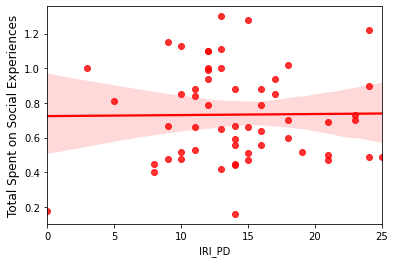

In [74]:
#sum of social  / iri pd

pyplot.scatter(social_sum, iri_pd)
pyplot.show()
covariance = cov(social_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
s_sum_iri_pd=sns.regplot(x="IRI_PD", y="total_spent_social", data=wtpdata,color="red");
s_sum_iri_pd.set_ylabel('Total Spent on Social Experiences',fontsize=12)
#s_sum_iri_total.figure.savefig('old_s_sum_iri_total_scatter.svg')

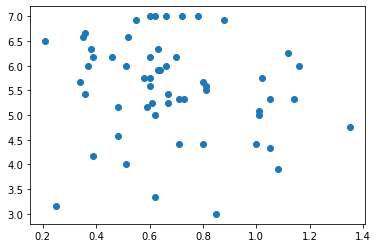

[[ 0.06405307 -0.04485798]
 [-0.04485798  0.99125853]]
Pearsons correlation: -0.178
p value: 0.1852
Accept null hypothesis that the means are equal.


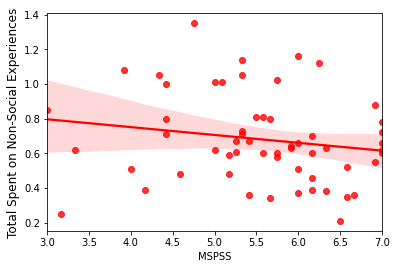

In [75]:
#sum of nonsocial / mulitdimensional scale of perceived social support
pyplot.scatter(nonsocial_sum, mspss)
pyplot.show()
covariance = cov(nonsocial_sum, mspss)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

ns_sum_mspss= sns.regplot(x="MSPSS", y="total_spent_nonsocial", data=wtpdata,color="red");
ns_sum_mspss.set_ylabel('Total Spent on Non-Social Experiences',fontsize=12)
ns_sum_mspss.figure.savefig('new_ns_sum_mspss_scatter.svg')

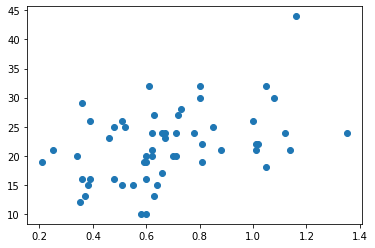

[[ 0.06405307  0.65907895]
 [ 0.65907895 38.2406015 ]]
Pearsons correlation: 0.421
p value: 0.0011
Reject the null hypothesis that the means are equal.


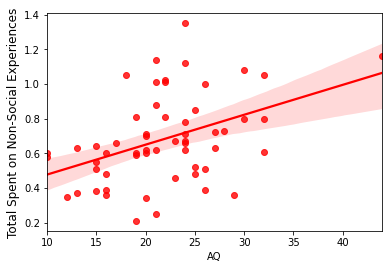

In [76]:
#sum of nonsocial  / aq
pyplot.scatter(nonsocial_sum, aq)
pyplot.show()
covariance = cov(nonsocial_sum, aq)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
ns_sum_aq=sns.regplot(x="AQ", y="total_spent_nonsocial", data=wtpdata,color="red");
ns_sum_aq.set_ylabel('Total Spent on Non-Social Experiences',fontsize=12)
ns_sum_aq.figure.savefig('new_ns_sum_aq_scatter.svg')

In [77]:
##############################################################################################

In [78]:
## total --  spent more on social vs non-social

print(sum(wtpdata.moresocial))

33


In [79]:
allmoresocials= pd.read_csv('allmoresocials.csv')
print(allmoresocials)

                 participant  avg_spent_social  avg_spent_nonsocial  \
0   5beaed3f0af61d0001968d9a          0.033846             0.030000   
1   5e70d4869ffb1404cb1f5070          0.024444             0.022174   
2   5efc9ea8f8e7950584b12e87          0.032258             0.031579   
3   5f3964ca4539e00bd5ce47fb          0.028750             0.028077   
4   5f793609f8089e53266336f5          0.030233             0.030000   
5   60fd9a010279e0f7e338571a          0.031154             0.026667   
6   60fdae513bfebe2fe0122138          0.030435             0.025769   
7   60fe2fb42ec6d443757a92fc          0.033571             0.032727   
8   60ff2035293107014b9770e8          0.032143             0.029167   
9   610040d9d3e1fbd63a3f41e5          0.029200             0.028000   
10  6100b292b7fc7f30ec9132dc          0.030303             0.027059   
11  6101667971d68405d105698a          0.025455             0.025357   
12  61023e0830e893bec6bd8f3c          0.029032             0.028947   
13  61

In [80]:
socialavg = allmoresocials.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.030367217793
standard error of the mean: 0.000765467731


In [81]:
nonsocialavg = allmoresocials.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.027815868793
standard error of the mean: 0.000791041285


In [82]:
#sample size
n = len(allmoresocials)
print(n)

29


In [83]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00033208139412336705 0.07398912099999999
0.0022623417407091556
0.0004201063146130469


In [84]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

6.073103191390988


In [85]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

28


In [86]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=6.073, df=28, cv=1.701, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


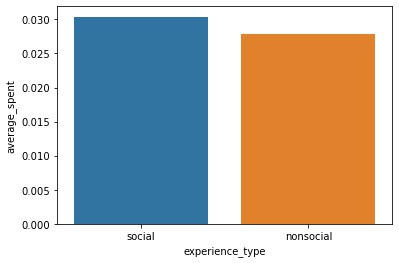

In [87]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)


In [88]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)


0.608682219770006


In [89]:
prop_social = allmoresocials['prop_social']
aq = allmoresocials.AQ #autism quotient
mspss = allmoresocials.MSPSS #perceived social support


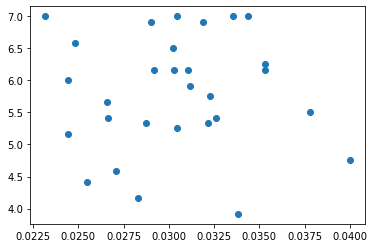

[[ 1.69922846e-05 -5.19022079e-05]
 [-5.19022079e-05  8.00150520e-01]]
Pearsons correlation: -0.014
p value: 0.9422
Accept null hypothesis that the means are equal.


In [90]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

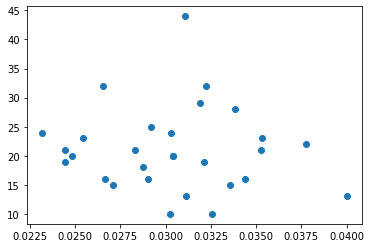

[[ 1.69922846e-05 -2.47059254e-03]
 [-2.47059254e-03  5.22857143e+01]]
Pearsons correlation: -0.083
p value: 0.6690
Accept null hypothesis that the means are equal.


In [91]:
#amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


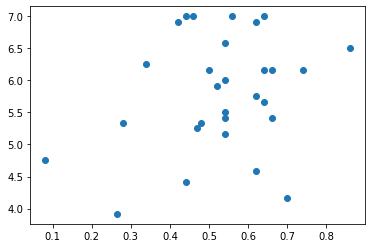

[[0.02456298 0.03784755]
 [0.03784755 0.80015052]]
Pearsons correlation: 0.270
p value: 0.1567
Accept null hypothesis that the means are equal.


In [92]:
##### prop of chosen social // self report #####
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


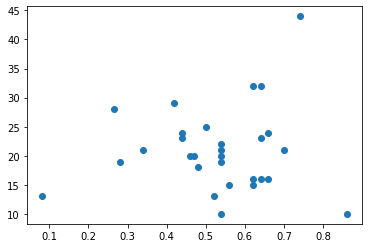

[[2.45629830e-02 9.48104955e-02]
 [9.48104955e-02 5.22857143e+01]]
Pearsons correlation: 0.084
p value: 0.6661
Accept null hypothesis that the means are equal.


In [93]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


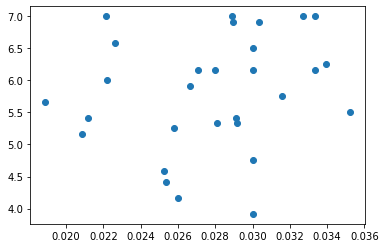

[[1.81466431e-05 7.60745099e-04]
 [7.60745099e-04 8.00150520e-01]]
Pearsons correlation: 0.200
p value: 0.2991
Accept null hypothesis that the means are equal.


In [94]:
##### avg spent on nonsocial // self report #####
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


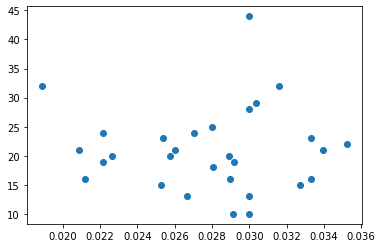

[[ 1.81466431e-05 -8.23825214e-04]
 [-8.23825214e-04  5.22857143e+01]]
Pearsons correlation: -0.027
p value: 0.8905
Accept null hypothesis that the means are equal.


In [95]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [96]:
###################################
#### t stat for proportions ####

In [97]:
prop_socialavg= allmoresocials.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


mean: 0.529528501034


In [98]:
prop_nonsocialavg= allmoresocials.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.470471498966


In [99]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

2.8521982518017497 1.71265306


In [100]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)


0.3134516422315245


In [101]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)


0.05820650870633522


In [102]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)


1.014611653946146


In [103]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

28


In [104]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=1.015, df=28, cv=1.701, p=0.319
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


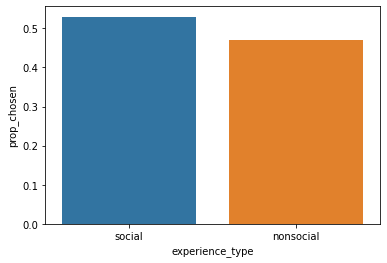

In [105]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)


In [106]:
###################################
#### t stats for sums #####

In [107]:
social_sum= allmoresocials.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))


mean: 0.792758620690


In [108]:
nonsocial_sum= allmoresocials.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.655862068966


In [109]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)


6.678300000000003 3.9699999999999998
0.46808197884158737


In [110]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0869206413555722


In [111]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

1.574960211857226


In [112]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

28


In [113]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=1.575, df=28, cv=1.701, p=0.126
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


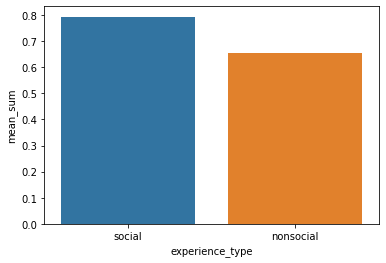

In [114]:
wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x=wtp_sum_means.experience_type, y=wtp_sum_means.mean_sum, data=wtp_sum_means)
